## EDA

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
himovies_df=pd.read_csv('data\Clean_df.csv')
himovies_df

,movie_name,release_year,imdb_grades,genres,casts,duration in min,country,production
0,Operation Mincemeat,2022,6.9,"Drama,History,War","MarkBonnar,HattieMorahan,JohnnyFlynn,MatthewMa...",128,UnitedKingdom,"ArcheryPictures,AFilmLocationCompany,CohenMedi..."
1,Memory,2022,5.6,"Crime,Thriller,Action,Mystery","LiamNeeson,TajAtwal,MonicaBellucci,HaroldTorre...",114,UnitedStatesofAmerica,"BlackBearPictures,SavilleProductions,OpenRoadF..."
2,Stanleyville,2021,5.6,Comedy,"JulianRichings,GeorgeTchortov,ChristianSerriti...",88,Canada,"ScythiaFilms,Anthropoid"
3,Scarborough,2021,7.1,Drama,"EssenceFox,ElliePosadas,LiamDiaz,CherishViolet...",136,Canada,"CompyFilms,levelFILM"
4,It's Hard But It's Fair,2022,5.6,Drama,"Osaze'Agod'Niamke,Derrick'Deuce'Keys,Moonrise'...",74,UnitedStatesofAmerica,MemphvilleManagementandDistribution
...,...,...,...,...,...,...,...,...
29375,The Shooting,1966,6.5,Western,"WarrenOates,WillHutchins,MilliePerkins,JackNic...",78,UnitedStatesofAmerica,"ProteusFilms,SantaClaraProductions"
29376,The Con Artists,2014,6.5,"Thriller,Action,Crime","KimWoo-bin,LeeHyun-woo,KimYeong-cheol,JoYoon-h...",116,SouthKorea,LotteEntertainment
29377,And There Were 4,2018,4.6,"Action,Drama,Fantasy","ShadnerIfrene,NathanielRyanJ,MysonneLinen,BekM...",83,UnitedStatesofAmerica,XXX
29378,From Time to Time,2009,6.7,"Adventure,Fantasy,Drama","MaggieSmith,DominicWest,TimothySpall,Alexander...",95,UnitedKingdom,"LionheadStudios,EalingStudios"


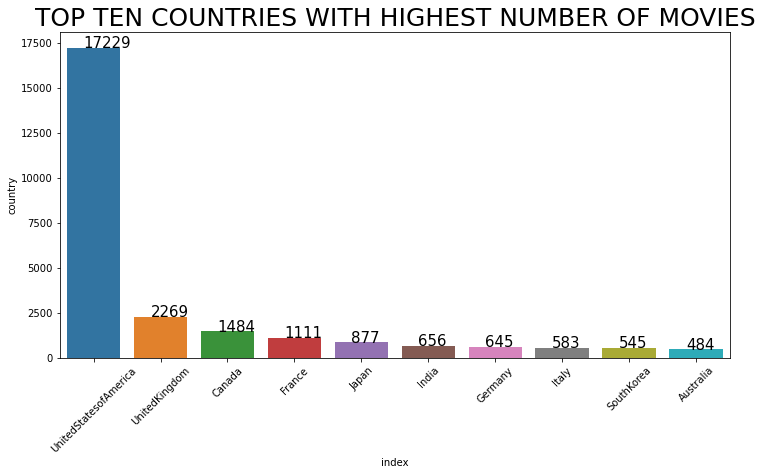

In [3]:
m=himovies_df["country"]
movies=m.value_counts().reset_index()[0:10]
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF MOVIES",fontsize=25)
ax=sns.barplot(x=movies["index"],y=movies["country"])
plt.xticks(rotation =45)
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

### America is the country that produces the most films, by a large margin from the other countries.
### In the other countries, we see that the number of movies homogeneous.

Text(0, 0.5, 'Frequency')

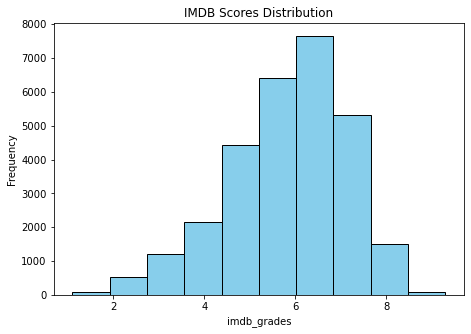

In [4]:
fig = plt.figure(figsize=(25, 5))
fig1 = fig.add_subplot(1,3,1)

fig1.hist(himovies_df.imdb_grades,color="skyblue",edgecolor='black')
fig1.set_title('IMDB Scores Distribution')
fig1.set_xlabel("imdb_grades")
fig1.set_ylabel("Frequency")

### This histogram shows us that most of the films’ IMDB scores lie between around 5.5–7.5

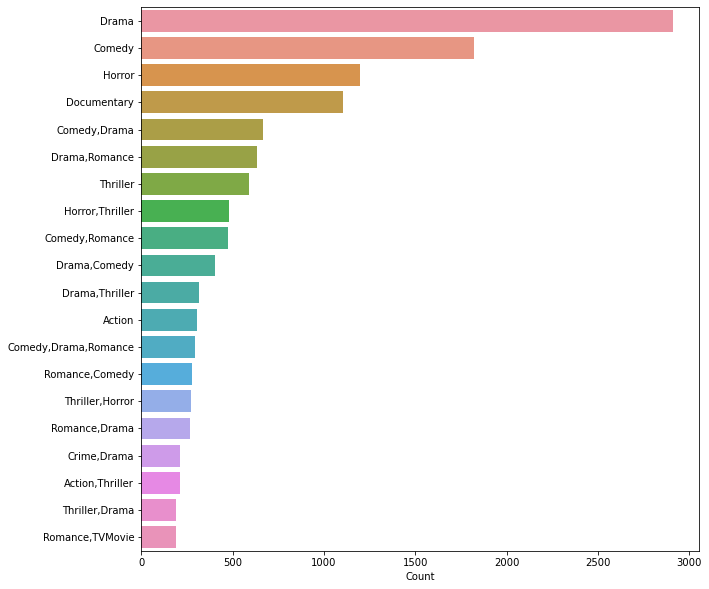

In [5]:
y=himovies_df.groupby("genres")['genres'].count().nlargest(20)
x = y.index
 
plt.figure(figsize=(10,10))
ax = sns.barplot(x= y, y = x)
ax.set(xlabel = 'Count')
ax.set(ylabel = '')

plt.show()

### From this, we can see that most of our data is about the drama genre

## We decided to split the genres column to get a better perspective on each film

In [6]:
for idx,row in enumerate (himovies_df['genres']):
    himovies_df['genres'].at[idx] = row.split(",")[0]        

himovies_df = himovies_df[himovies_df["genres"].str.contains("TVMovie") == False]

In [7]:
genre_filter=himovies_df['genres'].value_counts().loc[lambda x: x>300].to_frame()
genre_filter

,genres
Drama,6954
Comedy,4971
Action,2954
Horror,2708
Thriller,2132
Romance,1387
Documentary,1348
Crime,1177
Adventure,1050
ScienceFiction,719


### Since there have been many movies with different genres over the years, we’ll only analyze a few of the common genres from 2010 onwards

In [8]:
temp_df = himovies_df[himovies_df["genres"].str.contains("Drama|Comedy|Action|Horror|Thriller|Romance|Documentary|Adventure" ) == True]
temp_df = temp_df[temp_df['release_year']>=2010]

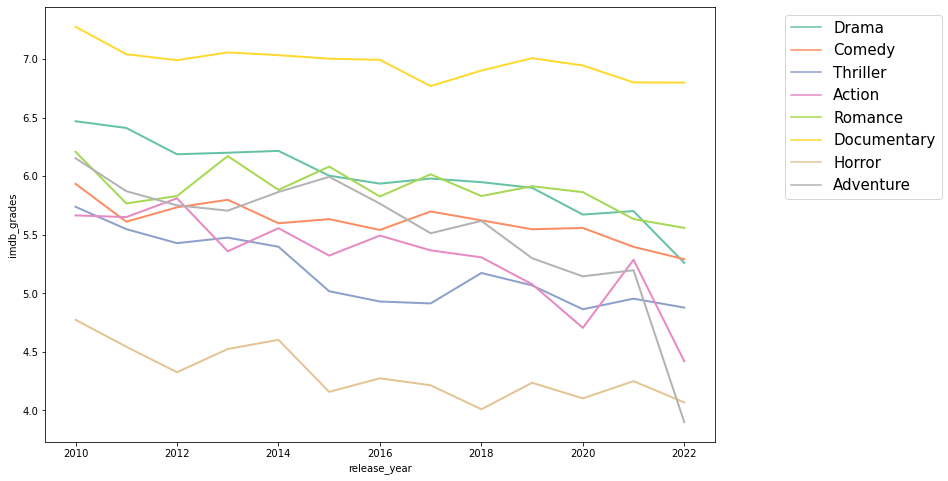

In [9]:
# plotting the genre_filter in a line plot along with the years 
g=sns.lineplot(data=temp_df, x=temp_df["release_year"], y=temp_df['imdb_grades'], hue=temp_df["genres"], ci=None,linewidth = 2, palette="Set2")
g.legend(loc='upper right', bbox_to_anchor=(1.35, 1), prop={'size': 15})
fig = plt.gcf()
fig.set_size_inches(12, 8)

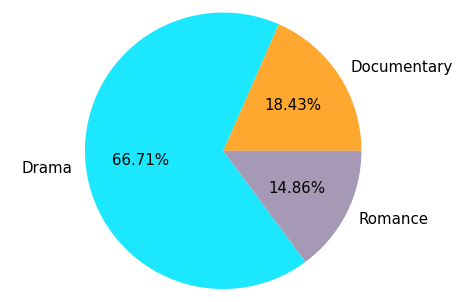

In [10]:
#storing the top 3 genres since 2010 with highest IMDB scores in a list 
list_of_genre= ["Documentary", "Drama", "Romance"] 

genre_list_count=[]
for i in range(0,3):
    genre_count=len(temp_df[temp_df['genres'] == list_of_genre[i]])

    genre_list_count.append(genre_count) # appending the total count of each genre in the list

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
colorss = ['#FEA82F','#1BE7FF','#A599B5']
ax.pie(genre_list_count, labels = list_of_genre,autopct='%1.2f%%', colors=colorss, wedgeprops = {'linewidth': 3}, radius=1.2, textprops = {"fontsize":15})
plt.show()

### In the lineplot graph, we can see that the Documentary genre leads in its IMDB score over the years since 2010, followed by the category of drama and finally the category of romance.

### The Pie graph shows the percentage amount of movies in the top genres above.

# Correlation

Text(0, 0.5, 'Relative frequency')

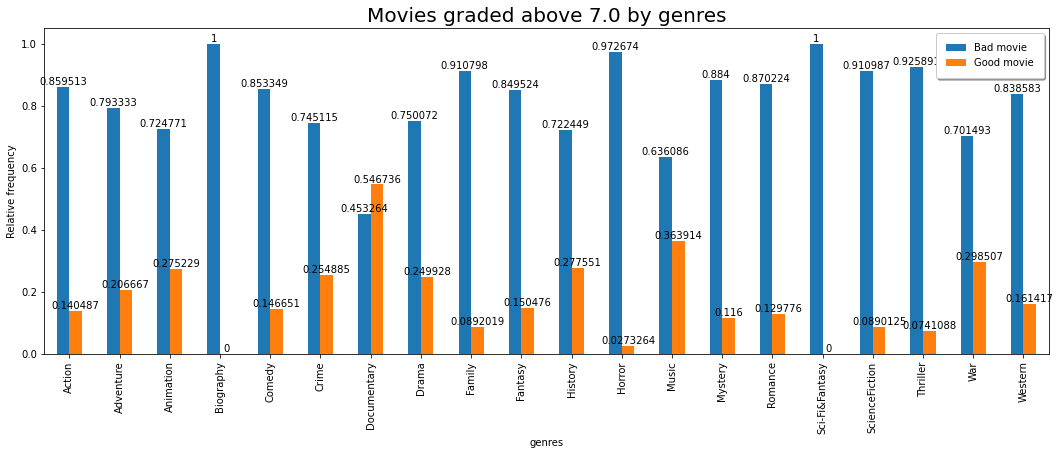

In [14]:
ct = pd.crosstab(himovies_df['genres'],(himovies_df['imdb_grades'] > 7) ,normalize="index")#.sort_values(by = 'imdb_grades', ascending=False)

ax = ct.plot(kind="bar", figsize=(18,6))
ax.legend(["Bad movie", "Good movie"],fancybox=True, framealpha=1, shadow=True, borderpad=1)

for container in ax.containers:
    ax.bar_label(container)
plt.title("Movies graded above 7.0 by genres", fontsize = 20)
plt.ylabel("Relative frequency")


In [12]:
corr = himovies_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,release_year,imdb_grades,duration in min
release_year,1.00,-0.30,-0.09
imdb_grades,-0.30,1.00,0.35
duration in min,-0.09,0.35,1.00
